# Redes Neuronales - Trabajo Práctico N° 2 - Ejercicio 2
# Notebook #6: Multilayer perceptron validando con k-folding

## Integrantes del grupo
* Gaytan, Joaquín Oscar
* Kammann, Lucas Agustín

# 1. Cargando base de datos

In [22]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [23]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np

In [25]:
import importlib

In [26]:
import sys

In [27]:
sys.path.insert(0, '..')

In [28]:
sys.path.insert(0, '../..')

In [29]:
# Read the database from the .csv file into a pandas dataframe
df = pd.read_csv('../../databases/insurance.csv')

# 2. Preprocesamiento de los datos

In [30]:
from sklearn import preprocessing

In [31]:
from src import helper
importlib.reload(helper);

## 2.1. Codificación de variables no numéricas o categóricas

In [32]:
# Create a label encoder for the sex variable or feature and create a new column in the dataframe 
# with the encoded version of the gender
sex_encoder = preprocessing.LabelEncoder()
sex_encoder.fit(df['sex'])
df['sex-encoded'] = sex_encoder.transform(df['sex'])

In [33]:
# Create a label encoder for the smoker variable or feature and create a new column in the dataframe
# with the encoded version of the smoker
smoker_encoder = preprocessing.LabelEncoder()
smoker_encoder.fit(df['smoker'])
df['smoker-encoded'] = smoker_encoder.transform(df['smoker'])

In [34]:
# Create a label encoder for the region variable or feature and create a new column in the dataframe
# with the encoded version of the region
region_encoder = preprocessing.LabelEncoder()
region_encoder.fit(df['region'])
df['region-encoded'] = region_encoder.transform(df['region'])

## 2.2. Eliminando outliers

In [35]:
# Remove outliers by setting NaN on those rows at the column of BMI
helper.remove_outliers(df, 'bmi')

# Remove NaN values from the dataframe
df = df.dropna()

## 2.3. Filtrado de variables

In [36]:
# Filtering or removing of non desired variables
df_x = df[['age', 'bmi', 'smoker-encoded', 'children', 'sex-encoded', 'region-encoded']]
df_y = df['charges']

# 3. Multilayer Perceptron y K-Folding

In [37]:
from src.ej2 import mlp_helper
importlib.reload(mlp_helper);

In [42]:
# Run model with KFold
train_maes, valid_maes, test_maes = mlp_helper.run_model_with_kfold(df_x, df_y, test_size=0.2, n_splits=8, random_state=20, 
                                                                    hidden_layers=5,
                                                                    units_per_layer=25,
                                                                    hidden_layer_activation='relu',
                                                                    epochs=500,
                                                                    batch_size=32,
                                                                    learning_rate=0.1, 
                                                                    decay_rate=0.01,
                                                                    optimizer='adam',
                                                                    beta_1=0.99,
                                                                    beta_2=0.999,
                                                                    tag='k-fold',
                                                                    tensorboard_on=False,
                                                                    summary_on=False
                                                                   )

# Inform results
mae_train = round(train_maes.mean(), 2)
mae_valid = round(valid_maes.mean(), 2)
mae_test = round(test_maes.mean(), 2)
print(f'[MAE] Train: {mae_train} Valid: {mae_valid} Test: {mae_test}')

[MAE] Train: 1310.76 Valid: 1330.61 Test: 1954.72


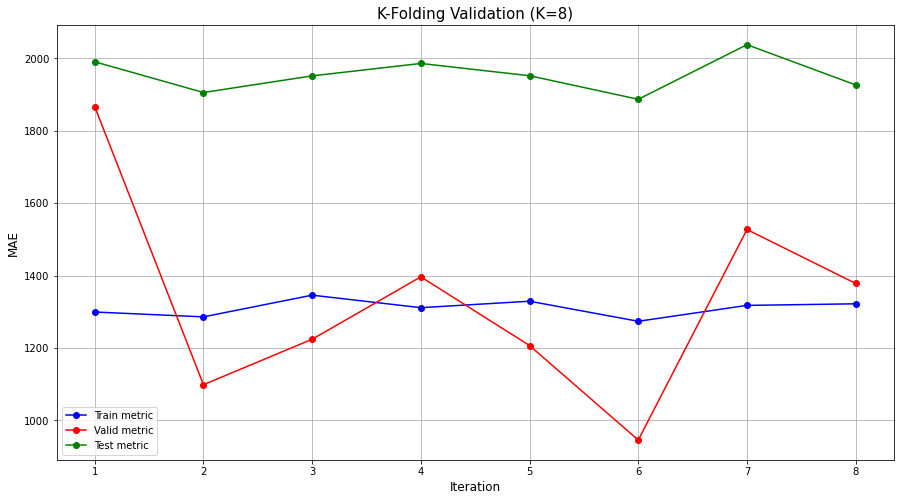

In [43]:
helper.plot_kfold_metrics(train_maes, valid_maes, test_maes)